# Lexical models vs Machine Learning

## Load the dataset

In [1]:
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xzf "/content/aclImdb_v1.tar.gz"
!pip install lxml
!pip install afinn

--2021-01-04 14:01:09--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  17.7MB/s    in 11s     

2021-01-04 14:01:20 (7.58 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]



In [2]:
import pandas as pd
import os
from sklearn.utils import shuffle

reviews=[]
sentiments=[]

lst=os.listdir('/content/aclImdb/train/pos/')
for fil in lst:
  with open('/content/aclImdb/train/pos/'+fil) as f:
    reviews.append(f.read())
    sentiments.append("positive")

lst=os.listdir('/content/aclImdb/train/neg/')
for fil in lst:
  with open('/content/aclImdb/train/neg/'+fil) as f:
    reviews.append(f.read())
    sentiments.append("negative")


lst=os.listdir('/content/aclImdb/test/pos/')
for fil in lst:
  with open('/content/aclImdb/test/pos/'+fil) as f:
    reviews.append(f.read())
    sentiments.append("positive")
    
lst=os.listdir('/content/aclImdb/test/neg/')
for fil in lst:
  with open('/content/aclImdb/test/neg/'+fil) as f:
    reviews.append(f.read())
    sentiments.append("negative")

total_df=pd.DataFrame({"review":reviews,"sentiment":sentiments})
total_df=shuffle(total_df)
total_df=total_df.reset_index(drop=True)
print(total_df.head())

print(len(total_df))


                                              review sentiment
0  It would be great if a discussion on this medi...  positive
1  Should this be an American movie I'd rate it 7...  positive
2  This movie is beautiful in many ways: the plot...  positive
3  Despite all of the comparisons to House of Fra...  positive
4  I'm normally not a Drama/Feel good movie kind ...  positive
50000


## Fulfilling all Dependencies

In [3]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata

nltk.download('all', halt_on_error=False)
nlp=spacy.load('en',parse=False,tag=False,entity=False)
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

## Data Normalization
The contraction map lists the words which needs to be expanded for proper analysis.

In [4]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

CONTRACTION_MAP = dict((k.lower(),v.lower()) for k,v in CONTRACTION_MAP.items())


In [5]:
contrac_pat=re.compile(r'{}'.format('|'.join(CONTRACTION_MAP.keys())),flags= re.IGNORECASE | re.DOTALL )

def strip_html_tags(txt):
  soup=BeautifulSoup(txt,'lxml')
  return soup.get_text()

def remove_accent_chars(txt):
  txt=unicodedata.normalize('NFKD',txt).encode('ascii','ignore').decode('utf-8','ignore')
  return txt

def expand_contractions(txt, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match) \
                                   if contraction_mapping.get(match) \
                                    else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, txt)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_special_char(txt):
  return re.sub(r'[^a-zA-z0-9\s]','',txt)

def lemmatize_txt(txt):
  txt=nlp(txt)
  return ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in txt])

def remove_stopwords(txt):
  tokens =tokenizer.tokenize(txt)
  tokens = [token.strip() for token in tokens]
  fil_txt= ' '.join([tk for tk in tokens if tk.lower() not in stopword_list])
  return fil_txt

In [6]:
# Function to normalise the text corpus
def normalize_corpus(corpus,pbar=None):
  for i,doc in enumerate(corpus):
    doc= strip_html_tags(doc)
    doc=remove_accent_chars(doc)
    doc=doc.lower()
    doc=expand_contractions(doc)
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
    doc= re.sub(r'([{.(-)!}])'," \\1 ",doc)
    doc= lemmatize_txt(doc)
    doc=remove_special_char(doc)
    doc =re.sub(' +',' ',doc)
    doc=remove_stopwords(doc)
    corpus[i]=doc
    if pbar is not None:
      pbar.update(1)
  return corpus



In [7]:
document = """<p>Héllo! Héllo! can you hear me! I just heard about <b>Python</b>!<br/>\r\n 
              It's an amazing language which can be used for Scripting, Web development,\r\n\r\n
              Information Retrieval, Natural Language Processing, Machine Learning & Artificial Intelligence!\n
              What are you waiting for? Go and get started.<br/> He's learning, she's learning, they've already\n\n
              got a headstart!</p>
           """
normalize_corpus([document])

['hello hello hear hear python amazing language use script web development information retrieval natural language processing machine learning artificial intelligence wait go get start learn learn already get headstart']

In [8]:
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

total_data=len(total_df)
pbar=tqdm(total=total_data)

normalize_corpus(total_df.review,pbar)

pbar.close()
train_df,test_df=train_test_split(total_df,test_size=0.3)

train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)
# Don't worry it'll take a while.

In [36]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

def model_performance(true_labels,predicted_labels,classes):
  conf_matrix=confusion_matrix(true_labels,predicted_labels)
  df_cm=pd.DataFrame(conf_matrix,index=classes,columns=classes)
  print("Accuracy: ",accuracy_score(true_labels,predicted_labels))
  print("Precison: ", precision_score(true_labels,predicted_labels, average='weighted'))
  print("Recall: ", recall_score(true_labels,predicted_labels, average='weighted'))
  print("F1 Score: ", f1_score(true_labels,predicted_labels, average='weighted'))
  print("Model Report: \n___________________________________________________",)
  print( classification_report(true_labels,predicted_labels))

  print("CONFUSION MATRIX: ")
  sn.heatmap(df_cm,annot=True, cmap="YlGnBu")

#Unsupervised Lexical Method

## AFINN Model

In [37]:
from afinn import Afinn

afn = Afinn(emoticons=True)
review_sample=[1278,3044,2198]
print(test_df.loc[review_sample])
for i,row in test_df.loc[review_sample].iterrows():
  print("REVIEW: ",row.review)
  print("Actual Sentiment: ",row.sentiment)
  print('Predicted Sentiment polarity: ',afn.score(row.review))     

                                                 review sentiment
1278  one beautifully morbid film ever see merhige c...  positive
3044  buster keaton find feature length voice three ...  positive
2198  faux russian scientist say two third way movie...  negative
REVIEW:  one beautifully morbid film ever see merhige create live painting unfold horrific violence sex minimalist retelling life jesus christ high contrast thick layer grain make question really see time use texture combine extreme contrast create incredible viewing experience film not everyone think keep open mind not quick condemn film content extremely rough make fairly important statement creation god humanity whether film work art shock value trash open discussion
Actual Sentiment:  positive
Predicted Sentiment polarity:  -3.0
REVIEW:  buster keaton find feature length voice three age fine sequence not quite hang together chariot race three age hilarious include 2 short one goat excellent
Actual Sentiment:  positive
Pred

In [38]:
# It'll take a long time, relax.
sentiment_polarity = [afn.score(review) for review in tqdm(total_df.review)]
predicted_sentiments= ['positive' if score>=1.5 else 'negative' for score in sentiment_polarity]

###Evaluating the performance


Accuracy:  0.72308
Precison:  0.7325462842911575
Recall:  0.72308
F1 Score:  0.7202328730646428
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.78      0.62      0.69     25000
    positive       0.69      0.82      0.75     25000

    accuracy                           0.72     50000
   macro avg       0.73      0.72      0.72     50000
weighted avg       0.73      0.72      0.72     50000

CONFUSION MATRIX: 


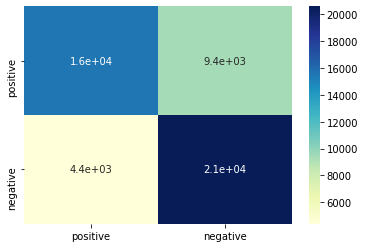

In [39]:
model_performance(total_df.sentiment,predicted_sentiments,classes=["positive","negative"])

## SentiWordNet

In [40]:
from nltk.corpus import sentiwordnet as swn
word = list(swn.senti_synsets('disgusting','a'))[0]
print("Positive score : ",word.pos_score())
print("Negative score : ",word.neg_score())
print("Objective score : ",word.obj_score())

Positive score :  0.25
Negative score :  0.75
Objective score :  0.0


In [41]:
def analyze_sentiwordnet_func(review,verbose=False):
  tagged_text=[(token.text,token.tag_) for token in nlp(review)]
  pos_score=neg_score=token_count=obj_score=0

  for word, tag in tagged_text:
      ss_set = None
      if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
          ss_set = list(swn.senti_synsets(word, 'n'))[0]
      elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
          ss_set = list(swn.senti_synsets(word, 'v'))[0]
      elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
          ss_set = list(swn.senti_synsets(word, 'a'))[0]
      elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
          ss_set = list(swn.senti_synsets(word, 'r'))[0]       
      if ss_set:
          pos_score += ss_set.pos_score()
          neg_score += ss_set.neg_score()
          obj_score += ss_set.obj_score()
          token_count += 1
      
  final_score=pos_score-neg_score
  norm_final_score = round(float(final_score)/token_count,3)
  final_sentiment ='positive' if norm_final_score>=0 else 'negative'
  if verbose:
    print("Sentiment: ",final_sentiment)
    print("Objectivity: ",round(float(obj_score)/token_count,3))
    print("Positivity: ",round(float(pos_score)/token_count,3))
    print("Negativity: ",round(float(neg_score)/token_count,3))
  return final_sentiment


    

In [42]:
for i,row in test_df.loc[review_sample].iterrows():
  print("REVIEW: ",row.review)
  print("Actual Sentiment: ",row.sentiment)
  print(analyze_sentiwordnet_func(row.review,True)) 
  print("-------------------------------------------------------------------------------------------------")

REVIEW:  one beautifully morbid film ever see merhige create live painting unfold horrific violence sex minimalist retelling life jesus christ high contrast thick layer grain make question really see time use texture combine extreme contrast create incredible viewing experience film not everyone think keep open mind not quick condemn film content extremely rough make fairly important statement creation god humanity whether film work art shock value trash open discussion
Actual Sentiment:  positive
Sentiment:  negative
Objectivity:  0.844
Positivity:  0.061
Negativity:  0.094
negative
-------------------------------------------------------------------------------------------------
REVIEW:  buster keaton find feature length voice three age fine sequence not quite hang together chariot race three age hilarious include 2 short one goat excellent
Actual Sentiment:  positive
Sentiment:  negative
Objectivity:  0.869
Positivity:  0.044
Negativity:  0.087
negative
------------------------------

In [43]:
predicted_sentiments=[analyze_sentiwordnet_func(review) for review in tqdm(total_df.review)]

###Evaluating the performance


Accuracy:  0.68318
Precison:  0.6833589468905669
Recall:  0.68318
F1 Score:  0.6831026819980056
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.69      0.67      0.68     25000
    positive       0.68      0.70      0.69     25000

    accuracy                           0.68     50000
   macro avg       0.68      0.68      0.68     50000
weighted avg       0.68      0.68      0.68     50000

CONFUSION MATRIX: 


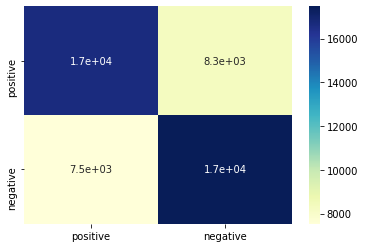

In [44]:
model_performance(total_df.sentiment,predicted_sentiments,classes=["positive","negative"])

##With VADER model

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def func_intensity_analyser(review,threshold=0.1,verbose=False):
  analyzer=SentimentIntensityAnalyzer()
  scores=analyzer.polarity_scores(review)

  agg_score=scores['compound']
  final_sentiment='positive' if agg_score>=threshold else 'negative'
  if verbose:
    positive = round(scores['pos'],2)*100
    final= round(agg_score,2)*100
    negative=round(scores['neg'],2)*100
    neutral =round(scores['neu'],2)*100

    print(f'POSITIVE : {positive}%')
    print(f'NEGATIVE : {negative}%')
    print(f'NEUTRAL : {neutral}%')
    print(f'FINAL : {final}')
    print(f'SENTIMENT : {final_sentiment}')
  
  return final_sentiment
  
  

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [46]:
for i,row in test_df.loc[review_sample].iterrows():
  print("REVIEW: ",row.review)
  print("Actual Sentiment: ",row.sentiment)
  func_intensity_analyser(row.review,verbose=True) 

REVIEW:  one beautifully morbid film ever see merhige create live painting unfold horrific violence sex minimalist retelling life jesus christ high contrast thick layer grain make question really see time use texture combine extreme contrast create incredible viewing experience film not everyone think keep open mind not quick condemn film content extremely rough make fairly important statement creation god humanity whether film work art shock value trash open discussion
Actual Sentiment:  positive
POSITIVE : 21.0%
NEGATIVE : 13.0%
NEUTRAL : 66.0%
FINAL : 52.0
SENTIMENT : positive
REVIEW:  buster keaton find feature length voice three age fine sequence not quite hang together chariot race three age hilarious include 2 short one goat excellent
Actual Sentiment:  positive
POSITIVE : 28.000000000000004%
NEGATIVE : 0.0%
NEUTRAL : 72.0%
FINAL : 80.0
SENTIMENT : positive
REVIEW:  faux russian scientist say two third way movie come science pretty much sum reason watch movie anything involve ha

In [47]:
predicted_sentiments = [func_intensity_analyser(r,threshold=0.4) for r in tqdm(total_df.review)]

### Evaluating the model performance

Accuracy:  0.70272
Precison:  0.711110460617632
Recall:  0.70272
F1 Score:  0.6997365516300188
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.75      0.60      0.67     25000
    positive       0.67      0.80      0.73     25000

    accuracy                           0.70     50000
   macro avg       0.71      0.70      0.70     50000
weighted avg       0.71      0.70      0.70     50000

CONFUSION MATRIX: 


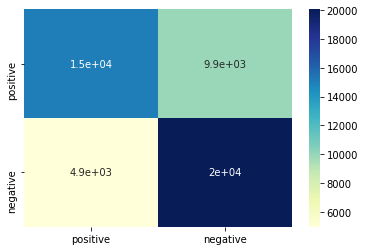

In [48]:
model_performance(total_df.sentiment,predicted_sentiments,classes=["positive",'negative'])

# Supervised ML Model

In [49]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer

cv= CountVectorizer(binary=False,min_df=0.0,max_df=1.0 , ngram_range=(1,2))
cv_train_features = cv.fit_transform(train_df.review)

tv= TfidfVectorizer(use_idf=True,min_df=0.0,max_df=1.0,ngram_range=(1,2),sublinear_tf=True)
tv_train_features =tv.fit_transform(train_df.review)

In [50]:
# Transforming Test reviews into features
cv_test_features= cv.transform(test_df.review)#bow
tv_test_features=tv.transform(test_df.review)#tfidf

In [51]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 2112499)  Test features shape: (15000, 2112499)
TFIDF model:> Train features shape: (35000, 2112499)  Test features shape: (15000, 2112499)


## Model Training, Prediction and Performance Evaluation

## Support Vector Machine Classifier

### SVM Model on BOW features

In [28]:
from sklearn.linear_model import SGDClassifier
svm=SGDClassifier(loss='hinge',penalty='l2',max_iter=10000)
svm.fit(cv_train_features,train_df.sentiment)

predicted_sentiments=svm.predict(cv_test_features)


Accuracy:  0.8971333333333333
Precison:  0.8972919804277444
Recall:  0.8971333333333333
F1 Score:  0.8971143062051256
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      7446
    positive       0.89      0.91      0.90      7554

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

CONFUSION MATRIX: 


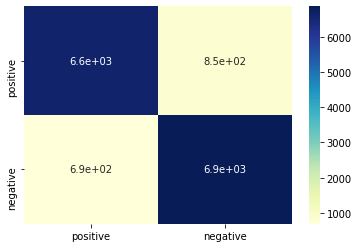

In [29]:
model_performance(test_df.sentiment,predicted_sentiments,classes=['positive','negative'])

### SVM Model on TF-IDF features

In [30]:
svm=SGDClassifier(loss='hinge',penalty='l2',max_iter=10000)
svm.fit(tv_train_features,train_df.sentiment)
predicted_sentiments=svm.predict(tv_test_features)

Accuracy:  0.8968
Precison:  0.8971140602352434
Recall:  0.8968
F1 Score:  0.8967673880734884
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      7446
    positive       0.89      0.91      0.90      7554

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

CONFUSION MATRIX: 


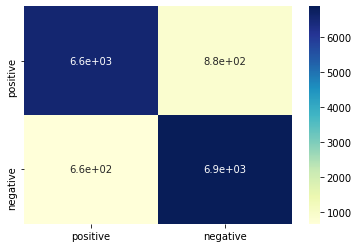

In [31]:
model_performance(test_df.sentiment,predicted_sentiments,classes=['positive','negative'])

## Logistic Regression

### Logistic Regression model on BOW features

In [32]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(penalty='l2',max_iter=1000)
lr.fit(cv_train_features,train_df.sentiment)

predicted_sentiments=lr.predict(cv_test_features)


Accuracy:  0.8994
Precison:  0.899465409950042
Recall:  0.8994
F1 Score:  0.8993902810111152
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      7446
    positive       0.89      0.91      0.90      7554

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

CONFUSION MATRIX: 


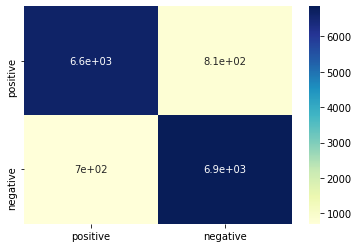

In [33]:
model_performance(test_df.sentiment,predicted_sentiments,classes=['positive','negative'])

### Logistic Regression model on TF-IDF features

In [34]:
lr=LogisticRegression(penalty='l2',max_iter=1000)
lr.fit(tv_train_features,train_df.sentiment)

predicted_sentiments=lr.predict(tv_test_features)

Accuracy:  0.8926666666666667
Precison:  0.892824779891688
Recall:  0.8926666666666667
F1 Score:  0.892646611447287
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

    negative       0.90      0.88      0.89      7446
    positive       0.89      0.90      0.89      7554

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000

CONFUSION MATRIX: 


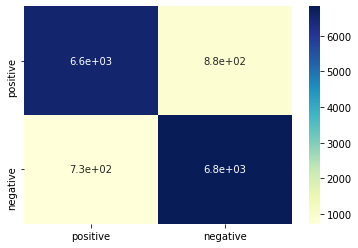

In [35]:
model_performance(test_df.sentiment,predicted_sentiments,classes=['positive','negative'])